Enter number of grid points: 700
Enter time step: .1
50000.48860099999
ham is
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [-0.2443005  0.488601  -0.2443005 ...  0.         0.         0.       ]
 [ 0.        -0.2443005  0.488601  ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.488601  -0.2443005  0.       ]
 [ 0.         0.         0.        ... -0.2443005  0.488601  -0.2443005]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]


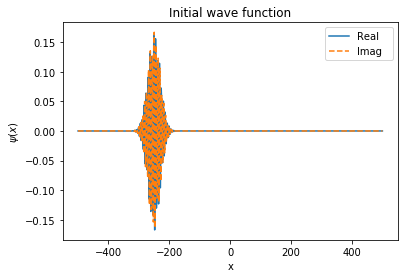

sliced
amplitudes
0.028196677040113548
7.810714402491081e-51


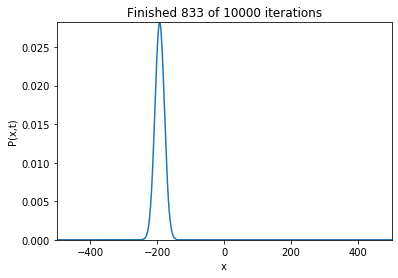

sliced
amplitudes
0.028155070411640268
5.619158911605395e-31


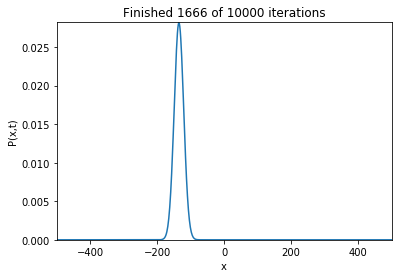

sliced
amplitudes
0.02807400410329913
1.602894295006748e-18


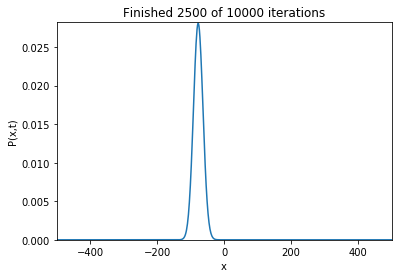

sliced
amplitudes
0.039333190154004966
9.39003642935779e-13


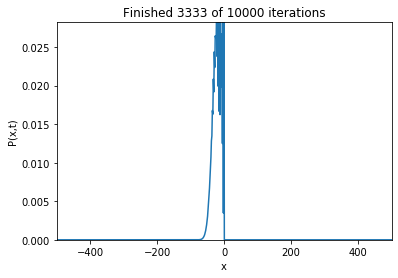

sliced
amplitudes
0.027916440734263855
2.5988774739140085e-12


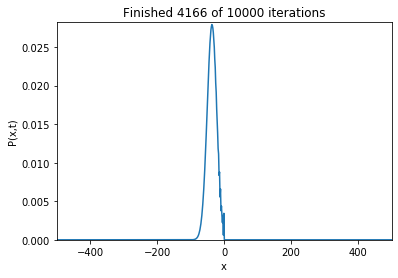

sliced
amplitudes
0.02776830840143576
2.587413270273414e-12


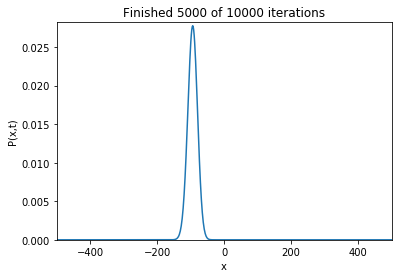

sliced
amplitudes
0.02761073616296763
2.572841721706446e-12


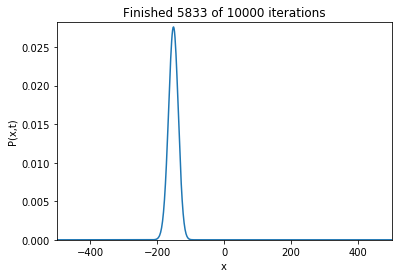

sliced
amplitudes
0.02742337213579287
2.555484822934567e-12


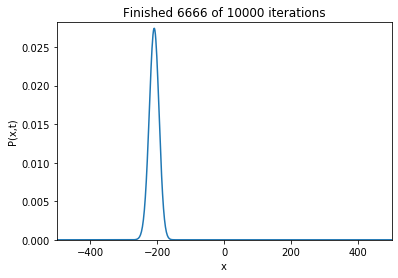

sliced
amplitudes
0.027246769566876546
2.5399976548124677e-12


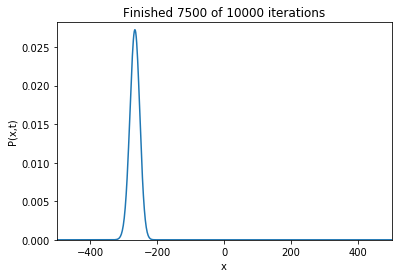

sliced
amplitudes
0.02705627534371874
2.522373995077506e-12


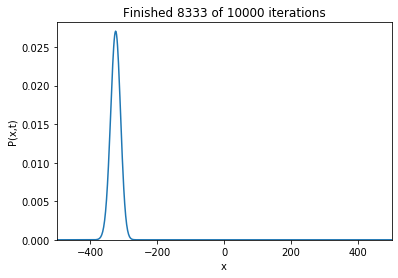

sliced
amplitudes
0.02683922976393244
2.5022561959041794e-12


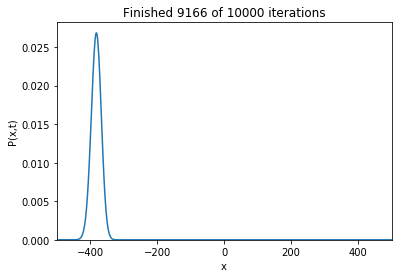

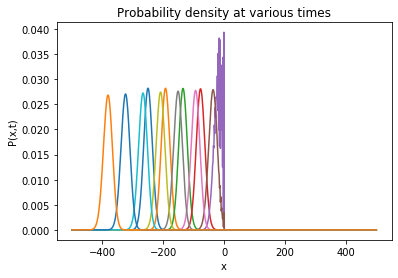

sliced
amplitudes
0.16235719632710033
0.155723556314767


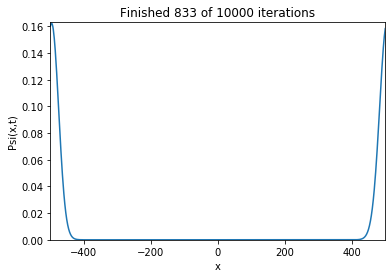

sliced
amplitudes
0.00612007893979788
0.16163039854076078


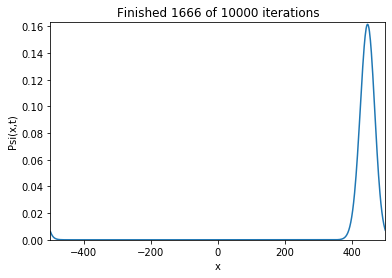

sliced
amplitudes
2.315354481036559e-06
0.1608233843975782


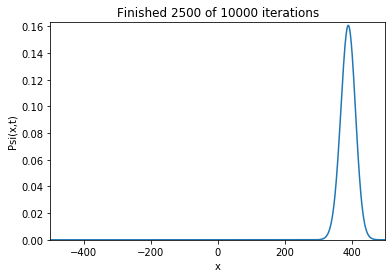

sliced
amplitudes
1.5450206404436254e-06
0.1599437873161009


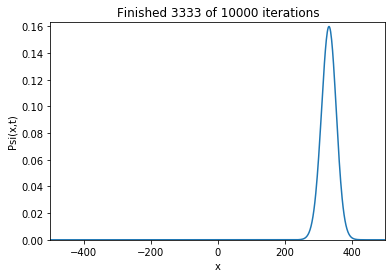

sliced
amplitudes
1.5376193887646538e-06
0.1591554763259586


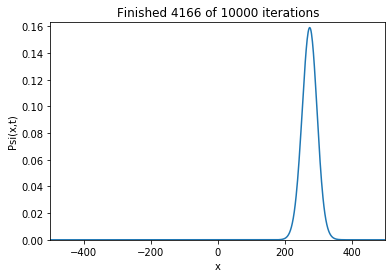

sliced
amplitudes
1.5294988492167128e-06
0.1583160084296398


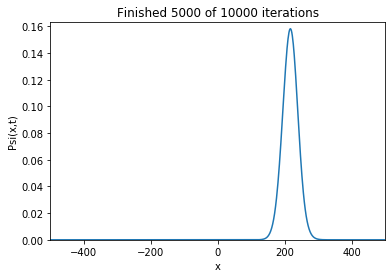

sliced
amplitudes
1.5206856470555353e-06
0.1574034952871354


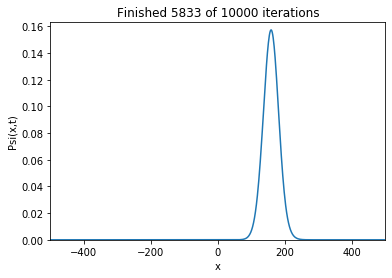

sliced
amplitudes
1.512511886434362e-06
0.1565128102510386


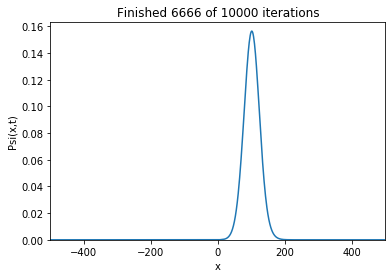

sliced
amplitudes
1.5076878739582123e-06
0.1556512597472051


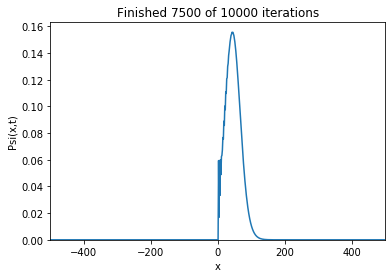

sliced
amplitudes
3.681800958613997e-06
0.24985575981105423


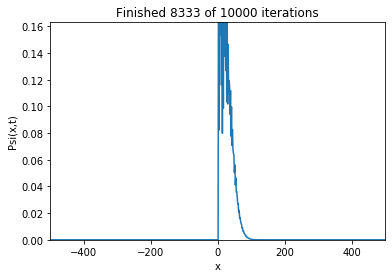

sliced
amplitudes
2.9730129098669195e-06
0.15378255300400442


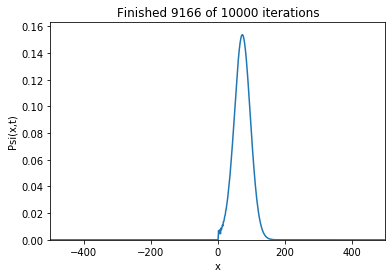

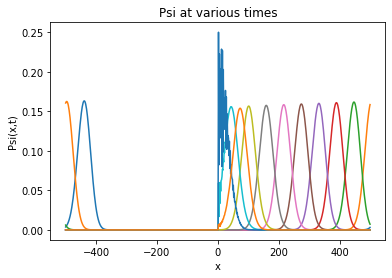

In [22]:
#  schro - Program to solve the Schrodinger equation 
#  for a free particle using the Crank-Nicolson scheme

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt


#* Initialize parameters (grid spacing, time step, etc.)
i_imag = 1j             # Imaginary i
N = int(input('Enter number of grid points: '));
L = 1000.                # System extends from -L/2 to L/2
h = L/(N-1)             # Grid size
x = np.arange(N)*h - L/2.  # Coordinates  of grid points
h_bar = 1.              # Natural units
mass = 1.# Natural units
u=.5
tau = float(input('Enter time step: '))

#* Set up the Hamiltonian operator matrix
ham = np.zeros((N,N))     # Set all elements to zero
coeff = -h_bar**2/(2*mass*h**2)
for i in range(1,N-1) :
    ham[i,i-1] = coeff
    ham[i,i] = -2*coeff   # Set interior rows
    ham[i,i+1] = coeff
delta=1/.00001
ham[int(N/2),int(N/2)] = -2*coeff + (u*delta) #Since the potential is the delta function is infinity at x=0 i.e. at the midpoint of the grids\
print(ham[int(N/2),int(N/2)])
print('ham is')
print(ham)                                        #
# First and last rows for periodic boundary conditions
ham[0,-1] = coeff;   ham[0,0] = -2*coeff;     ham[0,1] = coeff
ham[-1,-2] = coeff;  ham[-1,-1] = -2*coeff;   ham[-1,0] = coeff

#* Compute the Crank-Nicolson matrix
dCN = np.dot( np.linalg.inv(np.identity(N) + .5*i_imag*tau/h_bar*ham), 
             (np.identity(N) - .5*i_imag*tau/h_bar*ham) )


#* Initialize the wavefunction 
x0 = -L/4 # Location of the center of the wavepacket
p=1
sigma0=20
velocity = p/mass   # Average velocity of the packet
k0 = p/h_bar        # Average wavenumber
##sigma0 = L/10.   # Standard deviation of the wavefunction
Norm_psi = 1./(np.sqrt(sigma0*np.sqrt(np.pi)))   # Normalization
psi = np.empty(N,dtype=complex)
for i in range(N) :
    #psi[i] = Norm_psi * np.exp(i_imag*k0*x[i]) * np.exp(-(x[i]-x0)**2/(2*sigma0**2))
    psi[i] = Norm_psi*np.exp(i_imag*k0*x[i]) * np.exp(-(x[i]-x0)**2/(2*sigma0**2)) #NORMALIZED WAVE PACKET
    #psi[i] = np.exp(i_imag*p*x[i]/h_bar) * np.exp(-(x[i]-x0)**2/(2*sigma**2))
#* Plot the initial wavefunction
plt.plot(x,np.real(psi),'-',x,np.imag(psi),'--')
plt.xlabel('x');  plt.ylabel(r'$\psi(x)$')
plt.legend(('Real  ','Imag  '))
plt.title('Initial wave function')
plt.show()


#PLOTTING PROBABILITY
#* Initialize loop and plot variables 
max_iter = int(L/(velocity*tau)+.5)       # Particle should circle system
plot_iter = max_iter/12                   # Produce 12+1 curves
p_plot = np.empty((N,max_iter+1))         # Note that P(x,t) is real
p_plot[:,0] = np.absolute(psi[:])**2      # Record initial condition
iplot = 0
axisV = [-L/2., L/2., 0., max(p_plot[:,0])]   # Fix axis min and max


#* Loop over desired number of steps (wave circles system once)
for iter in range(max_iter) :

    #* Compute new wave function using the Crank-Nicolson scheme
    psi = np.dot(dCN,psi) 
  
    #* Periodically record values for plotting
    if (iter+1) % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = np.absolute(psi[:])**2
        #print('psi is')
        #print(np.absolute(psi[:])**2)
        
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        
        #AMPLITUDE OF REFLECTED AND TRANSMITTED WAVE BY SLICING THE REQUIRED ARRAY INTO HALVES AT MIDPOINT DUE TO DELTA FUNCTION AND TAKING MAX
        array=p_plot[:,iplot]

# clone the list by slicing
        copy_of_p_plot_1 = array[0:int(N/2)]  
        copy_of_p_plot_2 = array[int(N/2):N-1] 
        print('sliced')
      
        largest_1 = max(copy_of_p_plot_1)  
        largest_2 = max(copy_of_p_plot_2)
        print('amplitudes')
        print(largest_1)
        print(largest_2)
        
        plt.xlabel('x');   plt.ylabel('P(x,t)')
        plt.title('Finished %d of %d iterations' % (iter,max_iter))
        plt.axis(axisV);  plt.show()


#* Plot probability versus position at various times
pFinal = np.empty(N)
pFinal = np.absolute(psi[:])**2
for i in range(iplot+1) :
    plt.plot(x,p_plot[:,i])
plt.xlabel('x'); plt.ylabel('P(x,t)')
plt.title('Probability density at various times')
plt.show()

#PLOTTING PSI TIME SNAPSHOTS
p_plot[:,0] = np.absolute(psi[:])     # Record initial condition
iplot = 0
axisV = [-L/2., L/2., 0., max(p_plot[:,0])]   # Fix axis min and max


for iter in range(max_iter) :

    #* Compute new wave function using the Crank-Nicolson scheme
    psi = np.dot(dCN,psi) 
  
    #* Periodically record values for plotting
    if (iter+1) % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = np.absolute(psi[:])
        #print('psi is')
       # print(np.absolute(psi[:])**2)
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        #AMPLITUDE OF REFLECTED AND TRANSMITTED WAVE BY SLICING THE REQUIRED ARRAY INTO HALVES AT MIDPOINT DUE TO DELTA FUNCTION AND TAKING MAX
        array=p_plot[:,iplot]


        copy_of_p_plot_1 = array[0:int(N/2)]  
        copy_of_p_plot_2 = array[int(N/2):N-1] 
        print('sliced')
      
        largest_1 = max(copy_of_p_plot_1)  
        largest_2 = max(copy_of_p_plot_2)
        print('amplitudes')
        print(largest_1)
        print(largest_2)
        plt.xlabel('x');   plt.ylabel('Psi(x,t)')
        plt.title('Finished %d of %d iterations' % (iter,max_iter))
        
        plt.axis(axisV);  plt.show()
#* Plot PSI versus position at various times
pFinal = np.empty(N)
pFinal = np.absolute(psi[:])**2
for i in range(iplot+1) :
    plt.plot(x,p_plot[:,i])
plt.xlabel('x'); plt.ylabel('Psi(x,t)')
plt.title('Psi at various times')
plt.show()        


Enter number of grid points: 700
Enter time step: .1
1.8866010000000002
ham is
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [-0.2443005  0.488601  -0.2443005 ...  0.         0.         0.       ]
 [ 0.        -0.2443005  0.488601  ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.488601  -0.2443005  0.       ]
 [ 0.         0.         0.        ... -0.2443005  0.488601  -0.2443005]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]


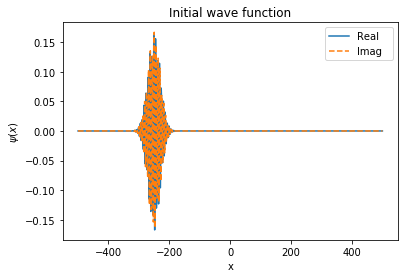

sliced
amplitudes
0.028180611927156932
7.062567935801397e-31


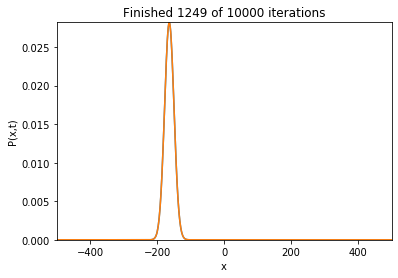

sliced
amplitudes
0.02807915766546782
1.7391500980911754e-09


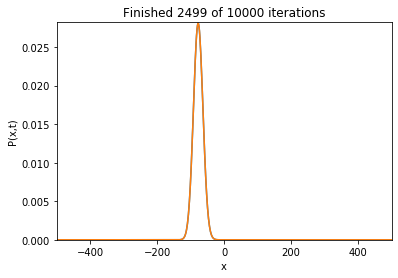

sliced
amplitudes
0.08950499644685518
0.002974267033454196


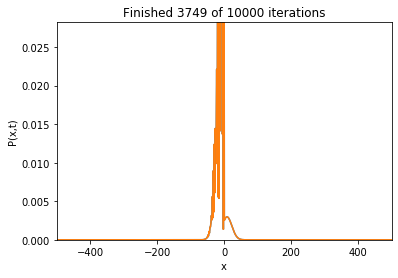

sliced
amplitudes
0.02480371271233662
0.00295638529556606


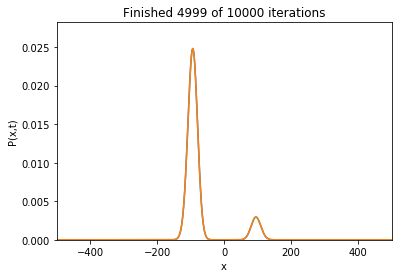

sliced
amplitudes
0.02458616969787086
0.0029306334185717135


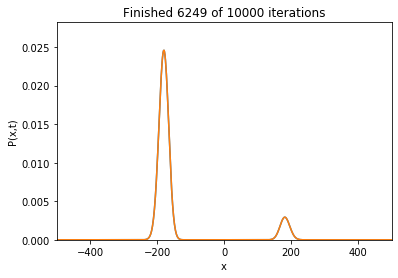

sliced
amplitudes
0.024327092238167796
0.0029009652692108872


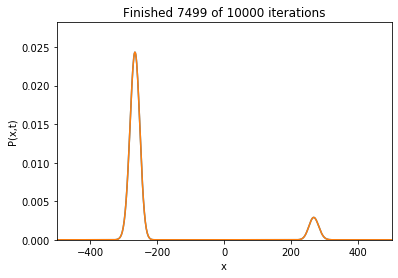

sliced
amplitudes
0.024068829333811808
0.0028703711639108892


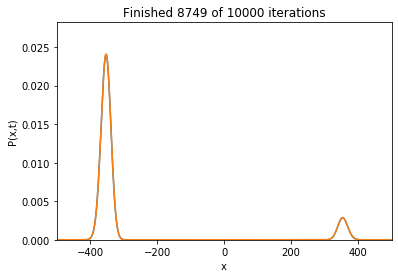

sliced
amplitudes
0.023754633109540638
0.002833061768309845


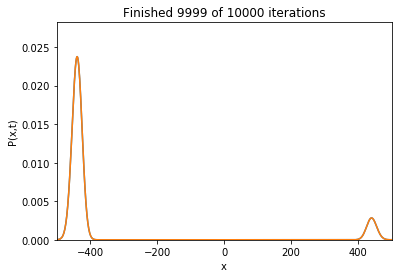

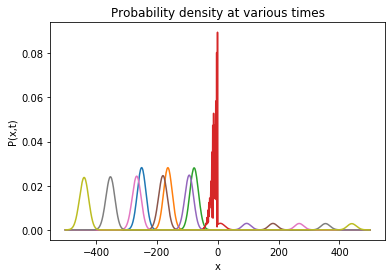

sliced
amplitudes
0.08561470794680086
0.15404020576810815


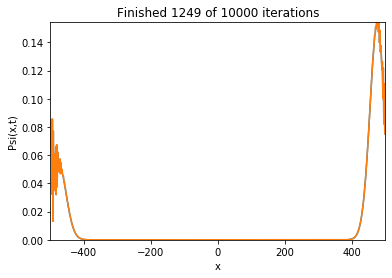

sliced
amplitudes
0.05249930332543146
0.15197781647364764


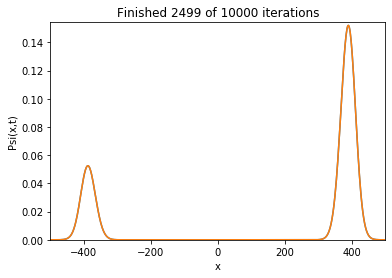

sliced
amplitudes
0.052085619655046315
0.1507385723721734


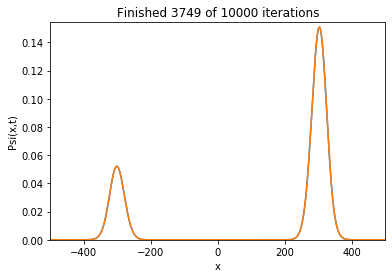

sliced
amplitudes
0.05168940681465036
0.14959111587351154


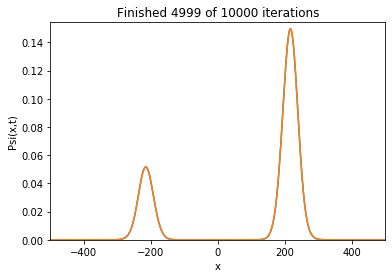

sliced
amplitudes
0.051239222833489396
0.14828906671098174


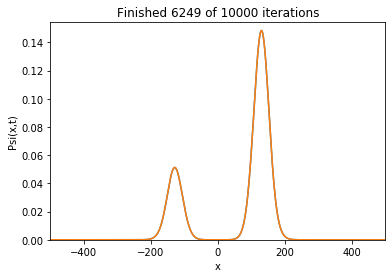

sliced
amplitudes
0.05087314435944863
0.14700977246732136


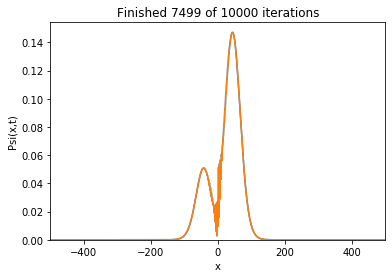

sliced
amplitudes
0.09513848187619457
0.12167596724686115


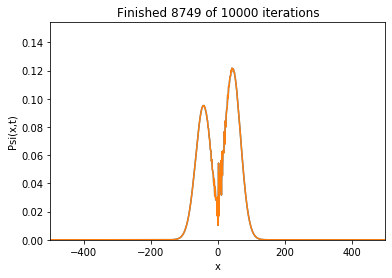

sliced
amplitudes
0.09436767897176285
0.12016570062549158


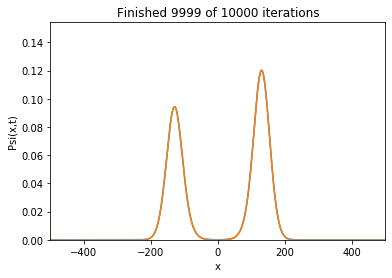

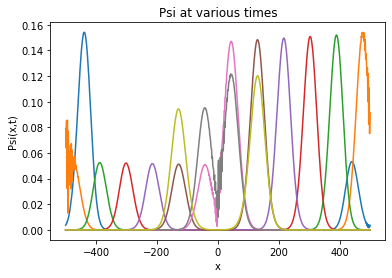

In [23]:
#  schro - Program to solve the Schrodinger equation 
#  for a free particle using the Crank-Nicolson scheme

#SAME CODE AS ABOVW WITH U=2, PLEASE CONSULT ABOVE CODES FOR ADDITIONAL COMMENTING

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt


#* Initialize parameters (grid spacing, time step, etc.)
i_imag = 1j             # Imaginary i
N = int(input('Enter number of grid points: '));
L = 1000.                # System extends from -L/2 to L/2
h = L/(N-1)             # Grid size
x = np.arange(N)*h - L/2.  # Coordinates  of grid points
h_bar = 1.              # Natural units
mass = 1.# Natural units
u=2.
tau = float(input('Enter time step: '))

#* Set up the Hamiltonian operator matrix
ham = np.zeros((N,N))     # Set all elements to zero
coeff = -h_bar**2/(2*mass*h**2)
for i in range(1,N-1) :
    ham[i,i-1] = coeff
    ham[i,i] = -2*coeff  # Set interior rows
    ham[i,i+1] = coeff
ham[int(N/2),int(N/2)] = -2*coeff + (u/h) #Since the potential is the delta function is infinity at x=0 i.e. at the midpoint of the grids\
print(ham[int(N/2),int(N/2)])
print('ham is')
print(ham)                                        #
# First and last rows for periodic boundary conditions
ham[0,-1] = coeff;   ham[0,0] = -2*coeff;     ham[0,1] = coeff
ham[-1,-2] = coeff;  ham[-1,-1] = -2*coeff;   ham[-1,0] = coeff

#* Compute the Crank-Nicolson matrix
dCN = np.dot( np.linalg.inv(np.identity(N) + .5*i_imag*tau/h_bar*ham), 
             (np.identity(N) - .5*i_imag*tau/h_bar*ham) )



#* Initialize the wavefunction 
x0 = -L/4 # Location of the center of the wavepacket
p=1
sigma0=20
velocity = p/mass   # Average velocity of the packet
k0 = p/h_bar        # Average wavenumber
##sigma0 = L/10.   # Standard deviation of the wavefunction
Norm_psi = 1./(np.sqrt(sigma0*np.sqrt(np.pi)))   # Normalization
psi = np.empty(N,dtype=complex)
for i in range(N) :
    #psi[i] = Norm_psi * np.exp(i_imag*k0*x[i]) * np.exp(-(x[i]-x0)**2/(2*sigma0**2))
    psi[i] = Norm_psi * np.exp(i_imag*k0*x[i]) * np.exp(-(x[i]-x0)**2/(2*sigma0**2))
    #psi[i] = np.exp(i_imag*p*x[i]/h_bar) * np.exp(-(x[i]-x0)**2/(2*sigma**2))
#* Plot the initial wavefunction
plt.plot(x,np.real(psi),'-',x,np.imag(psi),'--')
plt.xlabel('x');  plt.ylabel(r'$\psi(x)$')
plt.legend(('Real  ','Imag  '))
plt.title('Initial wave function')
plt.show()

#* Initialize loop and plot variables 
max_iter = int(L/(velocity*tau)+.5)       # Particle should circle system
plot_iter = max_iter/8                   # Produce 8+1 curves
p_plot = np.empty((N,max_iter+1))         # Note that P(x,t) is real
p_plot[:,0] = np.absolute(psi[:])**2      # Record initial condition
iplot = 0
axisV = [-L/2., L/2., 0., max(p_plot[:,0])]   # Fix axis min and max


#* Loop over desired number of steps (wave circles system once)
for iter in range(max_iter) :

    #* Compute new wave function using the Crank-Nicolson scheme
    psi = np.dot(dCN,psi) 
  
    #* Periodically record values for plotting
    if (iter+1) % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = np.absolute(psi[:])**2
        #print('psi is')
        #print(np.absolute(psi[:])**2)
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
                #print('psi is')
       # print(np.absolute(psi[:])**2)
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        array=p_plot[:,iplot]

# clone the list by slicing
        copy_of_p_plot_1 = array[0:int(N/2)]  
        copy_of_p_plot_2 = array[int(N/2):N-1] 
        print('sliced')
      
        largest_1 = max(copy_of_p_plot_1)  
        largest_2 = max(copy_of_p_plot_2)
        print('amplitudes')
        print(largest_1)
        print(largest_2)
  
        plt.xlabel('x');   plt.ylabel('P(x,t)')
        plt.title('Finished %d of %d iterations' % (iter,max_iter))
        plt.axis(axisV);  plt.show()


#* Plot probability versus position at various times
pFinal = np.empty(N)
pFinal = np.absolute(psi[:])**2
for i in range(iplot+1) :
    plt.plot(x,p_plot[:,i])
plt.xlabel('x'); plt.ylabel('P(x,t)')
plt.title('Probability density at various times')
plt.show()

#PSI SMAPSHOTS PLOTTING
p_plot[:,0] = np.absolute(psi[:])     # Record initial condition
iplot = 0
axisV = [-L/2., L/2., 0., max(p_plot[:,0])]   # Fix axis min and max
for iter in range(max_iter) :

    #* Compute new wave function using the Crank-Nicolson scheme
    psi = np.dot(dCN,psi) 
  
    #* Periodically record values for plotting
    if (iter+1) % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = np.absolute(psi[:])
        #print('psi is')
       # print(np.absolute(psi[:])**2)
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
                #print('psi is')
       # print(np.absolute(psi[:])**2)
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        array=p_plot[:,iplot]

# clone the list by slicing
        copy_of_p_plot_1 = array[0:int(N/2)]  
        copy_of_p_plot_2 = array[int(N/2):N-1] 
        print('sliced')

        largest_1 = max(copy_of_p_plot_1)  
        largest_2 = max(copy_of_p_plot_2)
        print('amplitudes')
        print(largest_1)
        print(largest_2)
  
        plt.xlabel('x');   plt.ylabel('Psi(x,t)')
        plt.title('Finished %d of %d iterations' % (iter,max_iter))
        
        plt.axis(axisV);  plt.show()
#* Plot PSI versus position at various times
pFinal = np.empty(N)
pFinal = np.absolute(psi[:])**2
for i in range(iplot+1) :
    plt.plot(x,p_plot[:,i])
plt.xlabel('x'); plt.ylabel('Psi(x,t)')
plt.title('Psi at various times')
plt.show()        



Enter number of grid points: 100
Enter time step: .1
0.207801
ham is
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [-0.0049005  0.009801  -0.0049005 ...  0.         0.         0.       ]
 [ 0.        -0.0049005  0.009801  ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.009801  -0.0049005  0.       ]
 [ 0.         0.         0.        ... -0.0049005  0.009801  -0.0049005]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]


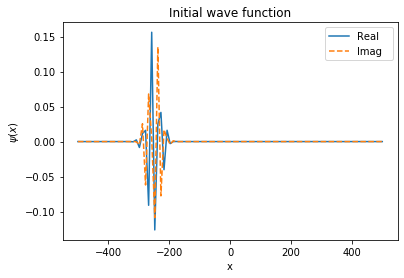

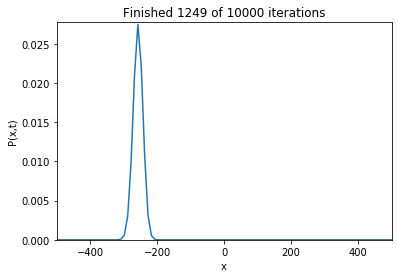

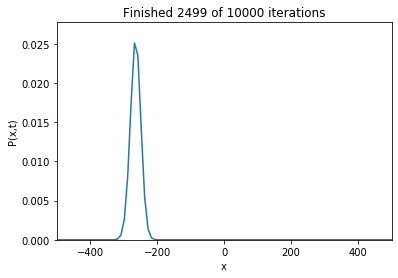

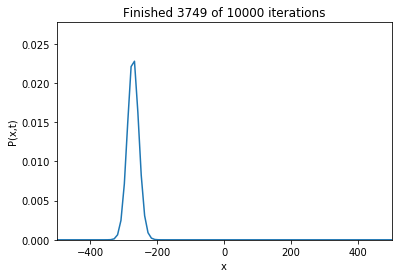

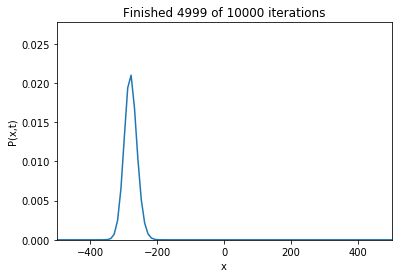

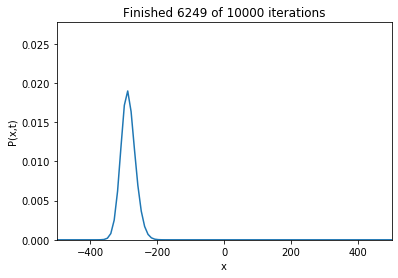

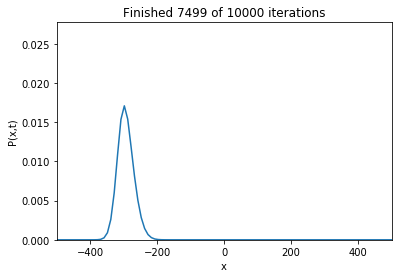

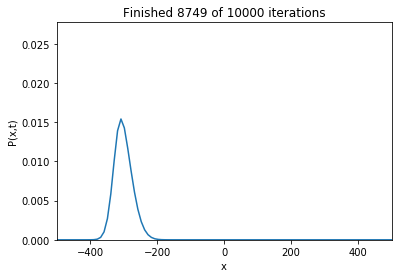

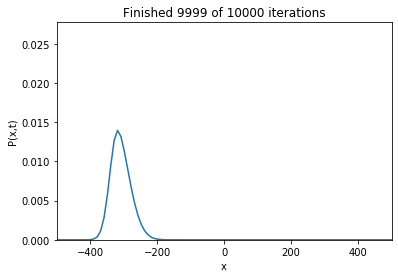

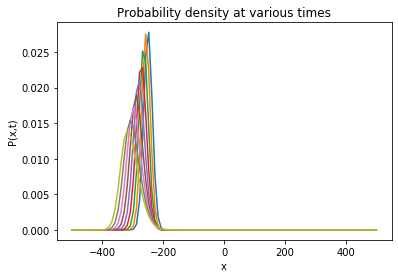

sliced
[7.28407715e-07 2.45900409e-06 7.91135326e-06 2.42034827e-05
 7.02385307e-05 1.92828286e-04 4.99306583e-04 1.21541848e-03
 2.77104139e-03 5.89288885e-03 1.16354174e-02 2.12218235e-02
 3.55550898e-02 5.43987872e-02 7.55839464e-02 9.50110604e-02
 1.08165176e-01 1.12750425e-01 1.10194798e-01 1.03696846e-01
 9.49704768e-02 8.45121766e-02 7.32651017e-02 6.20398581e-02
 5.12760670e-02 4.13817516e-02 3.25823116e-02 2.50014352e-02
 1.86664366e-02 1.35325749e-02 9.50206503e-03 6.44303528e-03
 4.20476866e-03 2.63174554e-03 1.57429267e-03 8.97241444e-04
 4.85977030e-04 2.49701539e-04 1.21582351e-04 5.60799440e-05
 2.45089236e-05 1.01555697e-05 3.99365673e-06 1.49224861e-06
 5.30508825e-07 1.79694353e-07 5.80768726e-08 1.79292945e-08
 5.30186334e-09 1.57312341e-09]
[4.02074545e-11 1.08942761e-11 2.83600844e-12 7.10188874e-13
 1.71281849e-13 3.98298758e-14 8.93988401e-15 1.93875399e-15
 4.06632949e-16 8.25605133e-17 1.62410462e-17 3.09807052e-18
 5.73523532e-19 1.03115723e-19 1.80189028e-20 

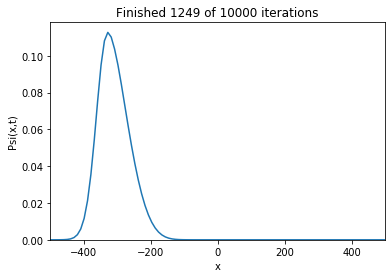

sliced
[4.21755440e-06 1.28517854e-05 3.72998766e-05 1.02865342e-04
 2.68856729e-04 6.64072203e-04 1.54513446e-03 3.37465054e-03
 6.89091453e-03 1.30973593e-02 2.30575586e-02 3.73975728e-02
 5.55738462e-02 7.52845663e-02 9.27022955e-02 1.04031874e-01
 1.07814099e-01 1.05837511e-01 1.00896092e-01 9.40460751e-02
 8.54657726e-02 7.59803299e-02 6.62506815e-02 5.66080270e-02
 4.74406630e-02 3.89753810e-02 3.13719650e-02 2.47176707e-02
 1.90373554e-02 1.43093947e-02 1.04749962e-02 7.44945288e-03
 5.13195213e-03 3.41358836e-03 2.18475340e-03 1.34074489e-03
 7.86419082e-04 4.39714663e-04 2.33906311e-04 1.18231290e-04
 5.67553477e-05 2.58750888e-05 1.12091415e-05 4.61783961e-06
 1.81110130e-06 6.77032338e-07 2.41564197e-07 8.23169798e-08
 2.68921737e-08 8.90113649e-09]
[2.26919789e-10 6.78668133e-11 1.95016792e-11 5.39080761e-12
 1.43521226e-12 3.68424130e-13 9.12883886e-14 2.18555725e-14
 5.06069771e-15 1.13439004e-15 2.46377685e-16 5.18910484e-17
 1.06067857e-17 2.10575374e-18 4.06331883e-19 

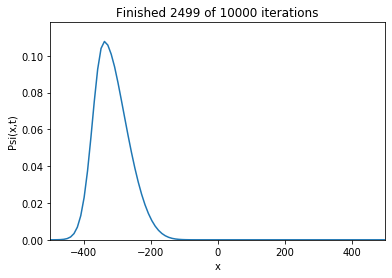

sliced
[1.99526947e-05 5.52396083e-05 1.45534193e-04 3.63960660e-04
 8.61611119e-04 1.92483329e-03 4.04391844e-03 7.95913142e-03
 1.46122149e-02 2.49051178e-02 3.92060414e-02 5.67072182e-02
 7.50193593e-02 9.05913113e-02 1.00277190e-01 1.03327066e-01
 1.01781807e-01 9.80373365e-02 9.26241970e-02 8.55322496e-02
 7.75238377e-02 6.91301729e-02 6.05830900e-02 5.22443091e-02
 4.43195232e-02 3.69728957e-02 3.03194965e-02 2.44184719e-02
 1.92951323e-02 1.49384884e-02 1.13131609e-02 8.36386321e-03
 6.02195023e-03 4.21088503e-03 2.85068538e-03 1.86205593e-03
 1.16951908e-03 7.04026895e-04 4.05080983e-04 2.22306087e-04
 1.16202436e-04 5.78133665e-05 2.73741651e-05 1.23397657e-05
 5.29945777e-06 2.17032095e-06 8.48649665e-07 3.16815832e-07
 1.13543835e-07 4.16434746e-08]
[1.05941844e-09 3.47113722e-10 1.09265264e-10 3.30852366e-11
 9.64808582e-12 2.71264560e-12 7.36135389e-13 1.93010538e-13
 4.89427078e-14 1.20138864e-14 2.85728411e-15 6.58969701e-16
 1.47492595e-16 3.20628567e-17 6.77455379e-18 

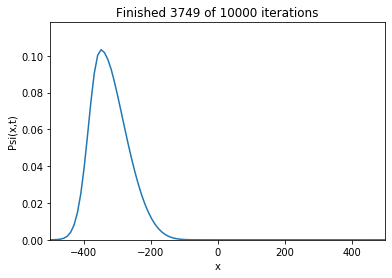

sliced
[7.91246196e-05 2.00010482e-04 4.80580981e-04 1.09465867e-03
 2.35658149e-03 4.77880435e-03 9.09408246e-03 1.61727560e-02
 2.67540957e-02 4.09664761e-02 5.77766512e-02 7.47489254e-02
 8.86159505e-02 9.68267362e-02 9.92349991e-02 9.80371534e-02
 9.52300253e-02 9.09226073e-02 8.50117628e-02 7.82316979e-02
 7.09988834e-02 6.34601371e-02 5.59538679e-02 4.86565205e-02
 4.17207256e-02 3.52730116e-02 2.93844802e-02 2.41080589e-02
 1.94605776e-02 1.54404096e-02 1.20248242e-02 9.17751853e-03
 6.85113897e-03 4.99116305e-03 3.53912540e-03 2.43520620e-03
 1.62066164e-03 1.03966169e-03 6.40804817e-04 3.78412332e-04
 2.13622427e-04 1.15108673e-04 5.91535827e-05 2.89838725e-05
 1.35435124e-05 6.03888539e-06 2.57230298e-06 1.04535654e-06
 4.08774980e-07 1.65210309e-07]
[4.19580087e-09 1.49689025e-09 5.13003339e-10 1.69097703e-10
 5.36728651e-11 1.64233884e-11 4.84988889e-12 1.38360120e-12
 3.81705745e-13 1.01928053e-13 2.63691195e-14 6.61463442e-15
 1.61019543e-15 3.80672713e-16 8.74677128e-17 

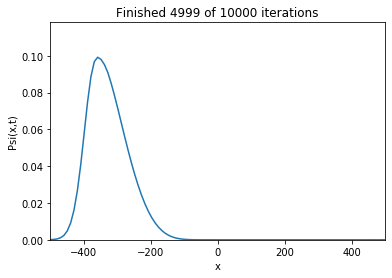

sliced
[2.68152407e-04 6.21165853e-04 1.36579401e-03 2.84208721e-03
 5.57876037e-03 1.02918075e-02 1.77714752e-02 2.85944047e-02
 4.26667293e-02 5.87653937e-02 7.44456959e-02 8.67327735e-02
 9.36260269e-02 9.54915462e-02 9.45944103e-02 9.25313154e-02
 8.90776762e-02 8.41086156e-02 7.83493719e-02 7.21116360e-02
 6.54725275e-02 5.87537546e-02 5.21007465e-02 4.56471791e-02
 3.95237426e-02 3.38000812e-02 2.85448694e-02 2.37890726e-02
 1.95529383e-02 1.58350371e-02 1.26228648e-02 9.89140682e-03
 7.60776861e-03 5.73272881e-03 4.22310463e-03 3.03374571e-03
 2.11910540e-03 1.43473326e-03 9.38403991e-04 5.91019550e-04
 3.57400329e-04 2.07034235e-04 1.14695670e-04 6.07078947e-05
 3.06879036e-05 1.48168101e-05 6.83979792e-06 3.00894179e-06
 1.27857694e-06 5.66732309e-07]
[1.43728760e-08 5.55536237e-09 2.06236839e-09 7.36258864e-10
 2.53055003e-10 8.38322347e-11 2.67973088e-11 8.27385300e-12
 2.46998049e-12 7.13610931e-13 1.99712832e-13 5.41879914e-14
 1.42663047e-14 3.64731731e-15 9.06182802e-16 

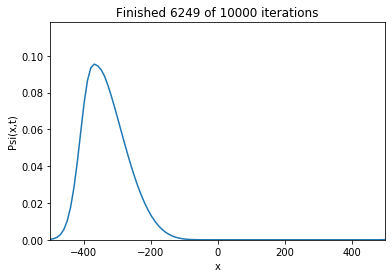

sliced
[7.88144573e-04 1.67741138e-03 3.38267964e-03 6.44272747e-03
 1.15478577e-02 1.94006045e-02 3.04162200e-02 4.42960913e-02
 5.96606902e-02 7.40904988e-02 8.49116866e-02 9.06354034e-02
 9.20582942e-02 9.14359539e-02 8.99680631e-02 8.71744557e-02
 8.29616689e-02 7.80536612e-02 7.26635825e-02 6.68137688e-02
 6.08162663e-02 5.47861704e-02 4.88353261e-02 4.30960924e-02
 3.76290192e-02 3.25112848e-02 2.77796467e-02 2.34674621e-02
 1.95865965e-02 1.61409013e-02 1.31212915e-02 1.05116926e-02
 8.28842248e-03 6.42307566e-03 4.88353177e-03 3.63543906e-03
 2.64349519e-03 1.87243675e-03 1.28799011e-03 8.57595444e-04
 5.50957830e-04 3.40525886e-04 2.01991384e-04 1.14789771e-04
 6.24266927e-05 3.24726386e-05 1.61709776e-05 7.66033482e-06
 3.52714779e-06 1.70702256e-06]
[4.32414923e-08 1.80319860e-08 7.22092479e-09 2.78010427e-09
 1.03027147e-09 3.67920707e-10 1.26748270e-10 4.21667838e-11
 1.35605191e-11 4.21966117e-12 1.27166810e-12 3.71489377e-13
 1.05283314e-13 2.89708132e-14 7.74607016e-15 

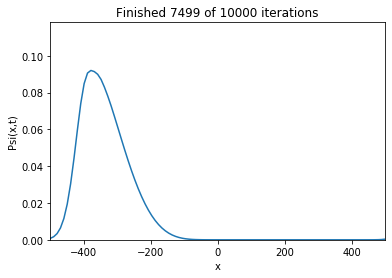

sliced
[2.03169223e-03 3.97929072e-03 7.36913540e-03 1.28573158e-02
 2.10521496e-02 3.22099713e-02 4.58450438e-02 6.04528432e-02
 7.36703432e-02 8.31323282e-02 8.78262452e-02 8.89036805e-02
 8.85407192e-02 8.75495687e-02 8.52655833e-02 8.16655326e-02
 7.74713487e-02 7.28016279e-02 6.76381239e-02 6.22894723e-02
 5.68416996e-02 5.13844326e-02 4.60515549e-02 4.08905357e-02
 3.59824311e-02 3.13654713e-02 2.70794234e-02 2.31446668e-02
 1.95751081e-02 1.63729169e-02 1.35341072e-02 1.10468257e-02
 8.89468005e-03 7.05653289e-03 5.50834374e-03 4.22384885e-03
 3.17551652e-03 2.33539755e-03 1.67576872e-03 1.16975785e-03
 7.91827756e-04 5.18122473e-04 3.26752168e-04 1.98114943e-04
 1.15261286e-04 6.42723604e-05 3.43794083e-05 1.74439054e-05
 8.68943748e-06 4.57072408e-06]
[1.15673359e-07 5.18561230e-08 2.23202533e-08 9.23466478e-09
 3.67668754e-09 1.41022828e-09 5.21664059e-10 1.86302232e-10
 6.43000170e-11 2.14680583e-11 6.94013748e-12 2.17432442e-12
 6.60741597e-13 1.94914153e-13 5.58594805e-14 

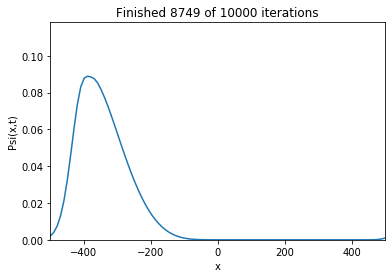

sliced
[4.63243928e-03 8.35590655e-03 1.42148228e-02 2.27179309e-02
 3.39663627e-02 4.73051212e-02 6.11346112e-02 7.31769433e-02
 8.13815757e-02 8.51781474e-02 8.60016631e-02 8.58866840e-02
 8.52750602e-02 8.33831605e-02 8.02848995e-02 7.66933417e-02
 7.26355488e-02 6.80662003e-02 6.32955025e-02 5.83814413e-02
 5.33924635e-02 4.84648470e-02 4.36312375e-02 3.89733860e-02
 3.45294476e-02 3.03402627e-02 2.64324518e-02 2.28246744e-02
 1.95275182e-02 1.65446998e-02 1.38734174e-02 1.15062468e-02
 9.43084745e-03 7.63187544e-03 6.09095759e-03 4.78790128e-03
 3.70116602e-03 2.80849364e-03 2.08748936e-03 1.51605251e-03
 1.07279824e-03 7.37391167e-04 4.90779806e-04 3.15360478e-04
 1.95104384e-04 1.16028669e-04 6.63755657e-05 3.58668395e-05
 1.93240531e-05 1.09905676e-05]
[2.77929619e-07 1.33526949e-07 6.15863808e-08 2.72983411e-08
 1.16410339e-08 4.78102659e-09 1.89317448e-09 7.23528186e-10
 2.67151501e-10 9.53945925e-11 3.29734222e-11 1.10426087e-11
 3.58610601e-12 1.13025952e-12 3.46003574e-13 

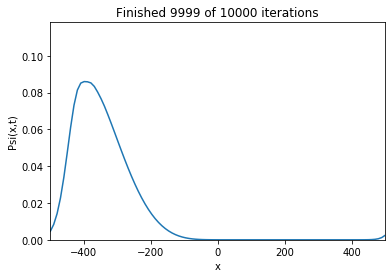

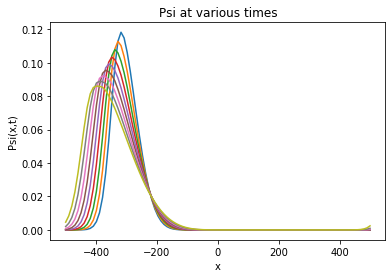